<a href="https://colab.research.google.com/github/DCLARKE23/Data_Mining_Decision_Trees/blob/main/Assignment_1_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a id='chap-tparbresdecision'></a>

# Assignment 1 - Decision Trees

The objective of this assignment is to demonstrate the implementation of decision trees for classification and regression problems. This document freely reproduces some examples shown in the excellent scikit-learn documentation.

Useful external references

- [NumPy documentation](https://docs.scipy.org/doc/numpy/user/index.html)  
- [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/)  
- [MatPlotLib documentation](http://matplotlib.org/)  
- [scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Python Programming languages](https://www.python.org)  

## Decision trees

Decision trees are nonparametric learning methods used for classification and regression problems. The goal is to create a model that predicts the values of the target variable, based on a set of sequences of decision rules inferred from the training data. The tree therefore approximates the target by a succession of if-then-else rules. This paradigm applies to both categorical and numerical data. The more complex the tree generated, the better the model “explains” the learning data but the higher the risk of over-fitting.

Decision trees have several advantages that make them interesting in contexts where it is useful to understand the sequence of decisions made by the model:

•	They are easy to understand and visualize.

•	They require little data preparation (normalization, etc.).

•	The cost of using trees is logarithmic.

•	They can use categorical and numerical data.

•	They can deal with multi-class problems.

•	White box model: the result is easy to conceptualize and visualize.

However, these models have two major disadvantages:

•	Over-fitting: sometimes the generated trees are too complex and generalize badly. Choosing good values for the maximum depth (max_depth) and minimum number of samples per leaf (min_samples_leaf) parameters avoids this problem.

•	It may happen that the generated trees are not balanced, which implies that the travel time is no longer logarithmic. It is therefore recommended to adjust the dataset before construction, to avoid that one class largely dominates the others in terms of the number of training examples


## Trees for classification

In scikit-learn, the class [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) allows to perform a multi-class classification using a decision tree.

We start by importing the right modules and building the tree object:

In [ ]:
# To install the last version of sklearn
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [1]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

For the example, we can define a minimalist dataset (two points, each in a class):

In [2]:
X = [[0, 0], [1, 1]]
y = [0, 1]

The tree is built using the `.fit(X, y)` method:

In [3]:
clf = clf.fit(X, y)

Prediction on new samples is done in the usual way with `.predict(X)` :

In [4]:
clf.predict([[2., 2.]])

array([1])

One can also predict the probability of each class for a sample:

In [5]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

## Classification of Iris data

`DecisionTreeClassifier` is able to handle multi-class classification problems (eg with labels 0, 1, … K-1). In this example we will work with the [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset, , easily accessible in `sklearn`. This dataset contains 150 instances of iris (a type of plant, each observation describes its morphology). The objective is to classify each instance into one of three categories: *Iris setosa*, *Iris virginica* or *Iris versicolor*.

One of the classes is linearly separable with respect to the other two, but the other two are not separable with respect to each other.


<dl style='margin: 20px 0;'>
<dt>The attributes of the dataset are:</dt>
<dd>
- sepal length,  
- sepal width,  
- petal length,  
- petal width,
- class: Iris Setosa, Iris Versicolor or Iris Virginica.


</dd>

</dl>

The Iris dataset being very common, scikit-learn offers a native function to load it into memory:

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

## Question 1

Calculate the statistics (mean and standard deviation) of the four explanatory variables: sepal length, sepal width, petal length and petal width.

In [13]:
import numpy as np
print("Standard Deviations")
print(np.std(iris.data[:, 0]))  # Sepal Length
print(np.std(iris.data[:, 1]))  # Sepal Width
print(np.std(iris.data[:, 2]))  # Petal Length
print(np.std(iris.data[:, 3]))  # Petal Width
print("")
print("Means")
print(np.mean(iris.data[:, 0]))  # Sepal Length
print(np.mean(iris.data[:, 1]))  # Sepal Width
print(np.mean(iris.data[:, 2]))  # Petal Length
print(np.mean(iris.data[:, 3]))  # Petal Width


Standard Deviations
0.8253012917851409
0.4344109677354946
1.759404065775303
0.7596926279021594

Means
5.843333333333334
3.0573333333333337
3.7580000000000005
1.1993333333333336


## Question 2

How many examples of each class are there?

In [24]:
target = iris.target
print(np.unique(target, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50]))


There are 50 of each  of the 3 types of iris flower: setosa, virginica and versicolor

Before building the model, let's split the dataset into two: 70% for training, 30% for testing.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

We can now build a decision tree on this data:

In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Once the training is finished, we can visualize the tree, either with  `matplotlib` using the `plot_tree` method, or with the  `graphviz` tool (dot command). For example, with  `matplotlib`:

[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

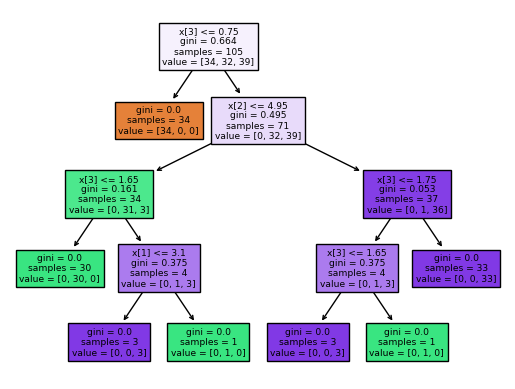

In [16]:
tree.plot_tree(clf, filled=True)

Alternatively, it is possible to export by producing a `.dot` file which is the default format of `graphviz`:

In [17]:
# Export the graph to the iris.dot file
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, filled=True)

Then, on the command line, it is possible to convert this file into many formats, for example into PDF (shell command):

## Note

Currently, this command does not work on CNAM's JupyterHub because dot is not installed.

In [20]:
%%bash
dot -Tpdf iris.dot -o iris.pdf

The generated image should look like this:

 <img src="https://scikit-learn.org/stable/_images/iris.png" style="width:100%;">


Once the model is built, it is possible to use it for prediction on new data:

In [18]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

The test score can be calculated this way:

In [19]:
clf.score(X_test, y_test)

0.9777777777777777

## Question 3:

Change the `max_depth` and `min_samples_leaf` parameter values. What do you notice?

0.9111111111111111

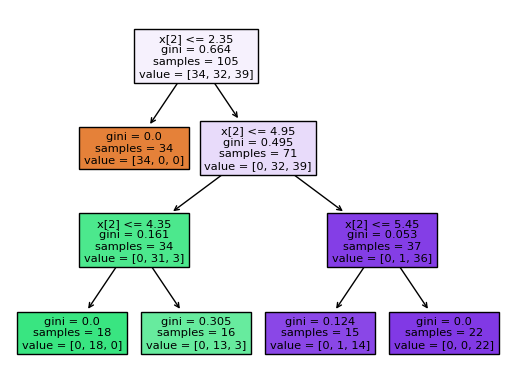

In [35]:
# repeat same as above but changed params

clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=15)
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)
clf.predict(X_test)
clf.score(X_test, y_test)

The GINI index values for the leaf nodes change when the number of samples increases. Specifically, with a larger sample size, the GINI index decreases, indicating a higher degree of equality. However, the score decreases, indicating less accurate predictions.

## Question 4:

The problem here being particularly simple, redo a training/test division with 5% of the data in training and 95% test.
Calculate the rate of misclassified items on the test set.
Vary (or better, perform a grid search with `GridSearchCV`) the values of the `max_depth` and `min_samples_leaf` parameters to measure their impact on this score.

Misclassification rate:  0.04895104895104896
Score:  0.951048951048951



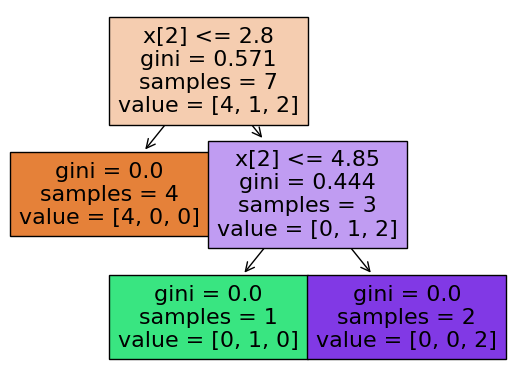

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=0)
clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf = 1)
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)

predicted_labels = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted_labels)
misclassifications = 1 - accuracy
print("Misclassification rate: ", misclassifications)
print("Score: ", clf.score(X_test, y_test))
print("")

The rate of misclassified items is proportional to the min_samples_leaf.

###   Display of the decision surface

For a pair of attributes, i.e., for two-dimensional observations, we can visualize the decision surface in 2 dimensions. First, we discretize the two-dimensional domain with a constant step and then we evaluate the model on each point of the grid.


In this example, we only keep the length and width of the petals.

<ipython-input-61-0f376a9ad563>:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


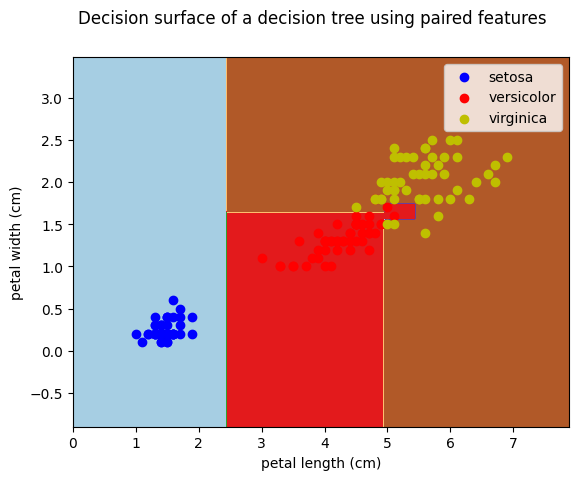

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choose the length and width attributes of the petals
pair = [2, 3]

# We only keep the two attributes
X = iris.data[:, pair]
y = iris.target

# Tree learning
clf = tree.DecisionTreeClassifier().fit(X, y)

# Display of the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Display of learning points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

### Question 5:

Redo the display for the other pairs of attributes. On which pair is the separation between the classes the most marked?

## 	Decision trees for regression

For regression with decision trees, scikit-learn offers the `DecisionTreeRegressor` class. As for the classification, the  `fit(...)` takes as input the parameter `X` (attributes of the observations). Warning: the `y` are not class labels but real values.

In [ ]:
from sklearn import tree

X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

In the following example, we will construct a sinusoidal signal affected by white noise and we will train a regression tree on this training data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# Create the training data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Pure sine wave")

# We add a random noise every 5 samples
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Noisy sine wave")

The objective is to regress this signal `y` from the values of `x`. For this, we use a regression tree.

In [ ]:
# Learn the model
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

# Prediction on the same range of values
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Display of results
plt.figure()
plt.scatter(X, y, c="darkorange", label="Training Examples")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prediction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Question 6:

Change the value of the `max_depth` parameter. What happens if we take too large a value? Too small? Change the rate of elements affected by noise (the `y[::5]`). When all elements are affected by noise, should a high or low value for `max_depth` be preferred?

## Question 7:

To deepen, load the Diabetes dataset from the `sklearn.datasets` module and make a random partition into learning part and test part (70% learning, 30% testing). Build a regression tree model on this basis. Calculate the root mean square error on the test set. Do a grid search to find the `max_depth` parameter value that minimizes this error.